<a href="https://colab.research.google.com/github/muhfadh/CBIR-Batik-Transformer/blob/main/Basic%20opencv%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [46]:
cd gdrive/MyDrive/ImageRetrieval/

[Errno 2] No such file or directory: 'gdrive/MyDrive/ImageRetrieval/DataSetBatik-master/CitraBatik'
/content/gdrive/MyDrive/ImageRetrieval


In [47]:
cd DataSetBatik-master/CitraBatik

/content/gdrive/My Drive/ImageRetrieval/DataSetBatik-master/CitraBatik


In [45]:
ls

DataSetBatik-master/  DataSetBatik-master.zip  Untitled0.ipynb


In [3]:
import zipfile
import os

In [11]:
!jar xvf DataSetBatik-master.zip

Streaming output truncated to the last 5000 lines.
 inflated: DataSetBatik-master/CitraBatik/51-49.jpg
 inflated: DataSetBatik-master/CitraBatik/51-5.jpg
 inflated: DataSetBatik-master/CitraBatik/51-50.jpg
 inflated: DataSetBatik-master/CitraBatik/51-51.jpg
 inflated: DataSetBatik-master/CitraBatik/51-52.jpg
 inflated: DataSetBatik-master/CitraBatik/51-53.jpg
 inflated: DataSetBatik-master/CitraBatik/51-54.jpg
 inflated: DataSetBatik-master/CitraBatik/51-55.jpg
 inflated: DataSetBatik-master/CitraBatik/51-56.jpg
 inflated: DataSetBatik-master/CitraBatik/51-57.jpg
 inflated: DataSetBatik-master/CitraBatik/51-58.jpg
 inflated: DataSetBatik-master/CitraBatik/51-59.jpg
 inflated: DataSetBatik-master/CitraBatik/51-6.jpg
 inflated: DataSetBatik-master/CitraBatik/51-60.jpg
 inflated: DataSetBatik-master/CitraBatik/51-61.jpg
 inflated: DataSetBatik-master/CitraBatik/51-62.jpg
 inflated: DataSetBatik-master/CitraBatik/51-63.jpg
 inflated: DataSetBatik-master/CitraBatik/51-64.jpg
 inflated: Data

# Arithmetic

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [64]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [38]:
image = "1-1.jpg"

In [49]:
image

In [32]:
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [33]:
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


In [39]:
image = cv2.imread(image)


In [43]:
from PIL import Image

In [51]:
image = Image.open("1-1.jpg") 

In [55]:
args = {
	"image": "1-1.jpg"
}

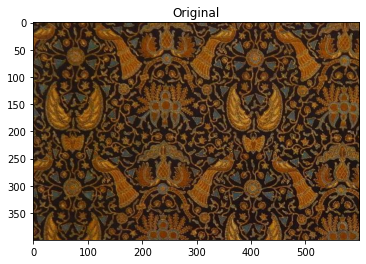

In [65]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

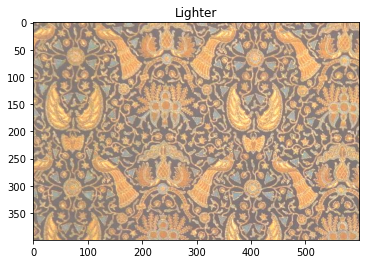

In [66]:
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

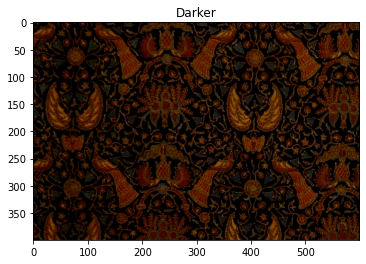

In [67]:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

C

# Cropping


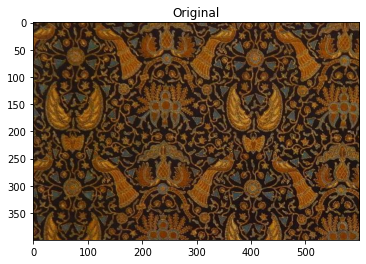

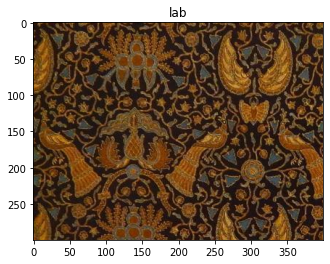

In [68]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

lab = image[100:550, 100:500]
plt_imshow("lab", lab)

## Drawing

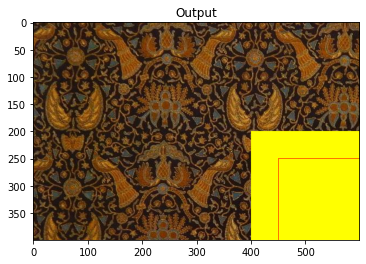

In [69]:
image = cv2.imread(args["image"])

cv2.rectangle(image, (400, 200), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (450, 250), (1150, 550), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)

# Flipping

[INFO] flipping image horizontally...


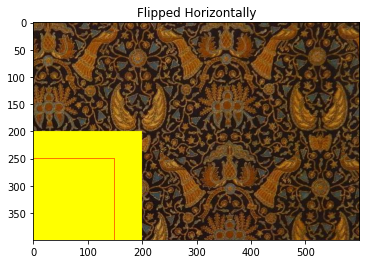

In [70]:
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


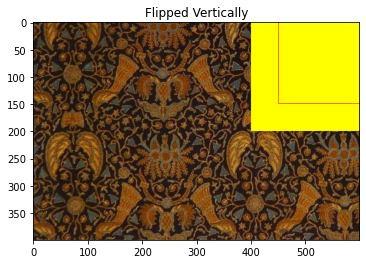

In [71]:
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


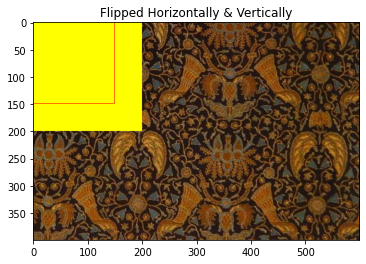

In [72]:
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

# Masking

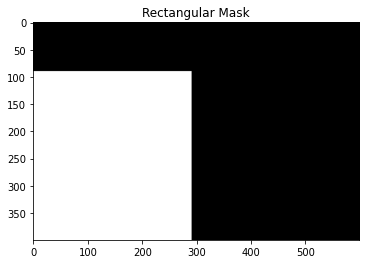

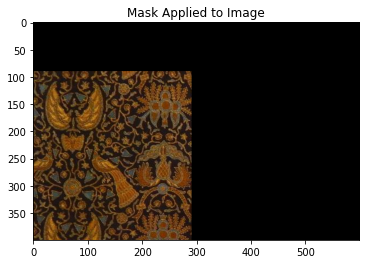

In [73]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

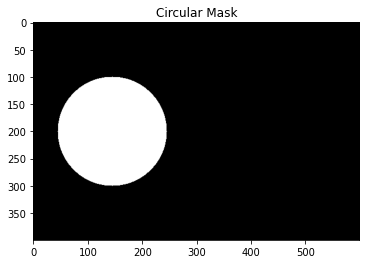

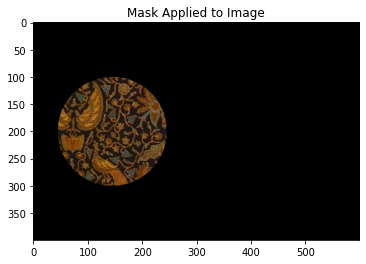

In [74]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

# Pixeling

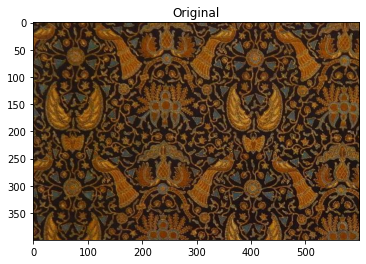

In [75]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [76]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 35, Green: 25, Blue: 34
Pixel at (50, 20) - Red: 128, Green: 99, Blue: 41
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


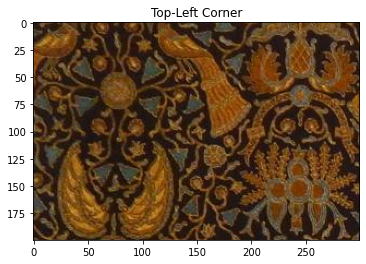

In [77]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

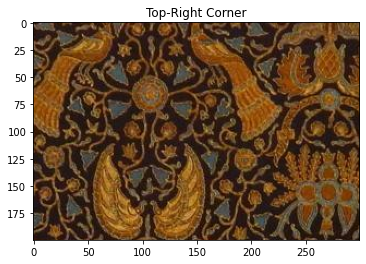

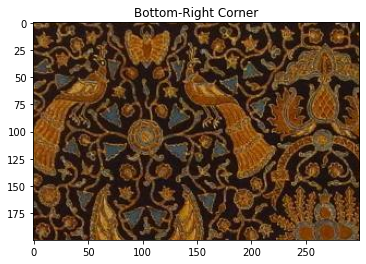

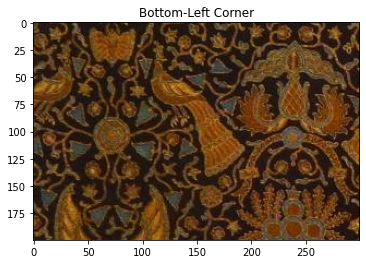

In [78]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

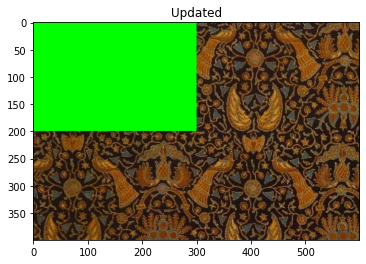

In [79]:

# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

# read and write image

In [80]:
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 600 pixels
height: 400  pixels
channels: 3


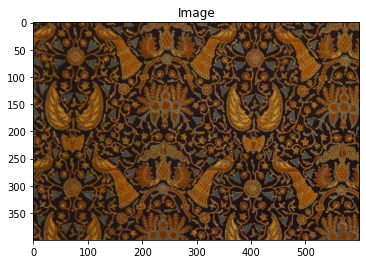

True

In [81]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("1-1.jpg", image)

# Resizing

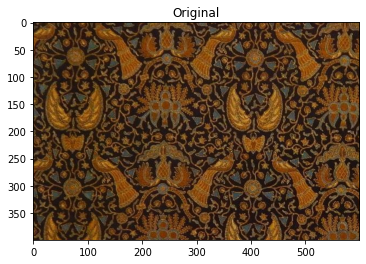

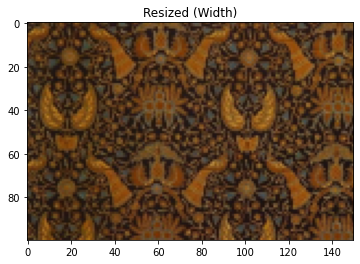

In [82]:

# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)


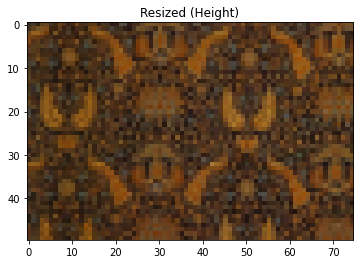

In [83]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

In [85]:
import imutils

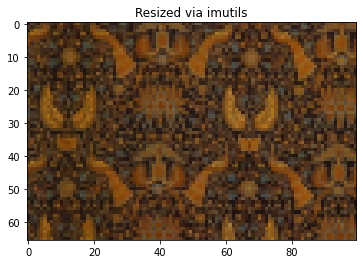

In [86]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


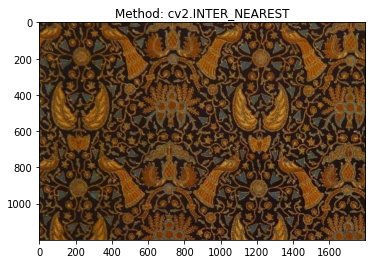

[INFO] cv2.INTER_LINEAR


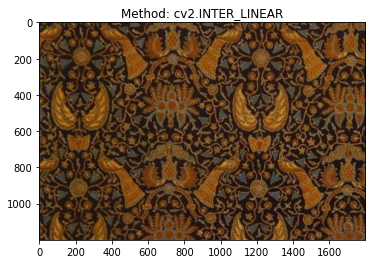

[INFO] cv2.INTER_AREA


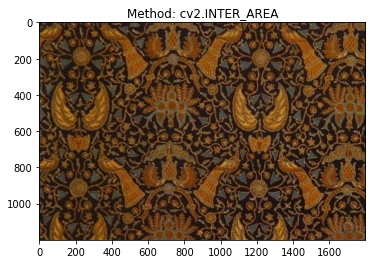

[INFO] cv2.INTER_CUBIC


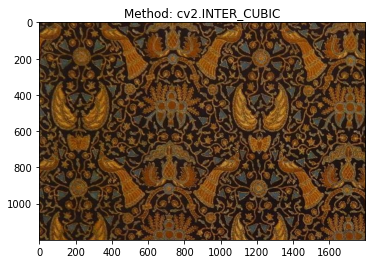

[INFO] cv2.INTER_LANCZOS4


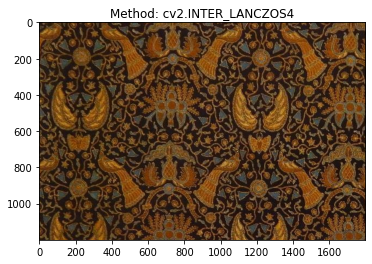

In [87]:

# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

# Rotate

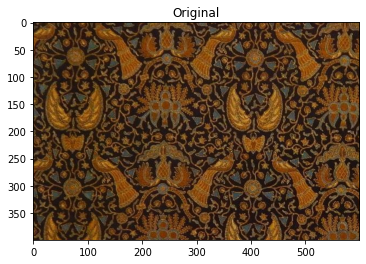

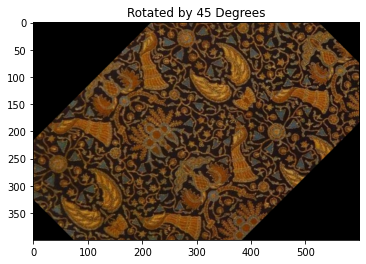

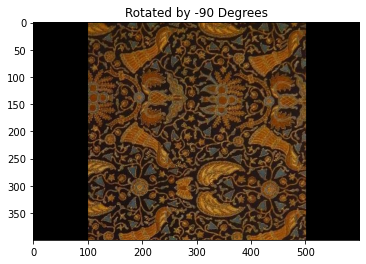

In [88]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

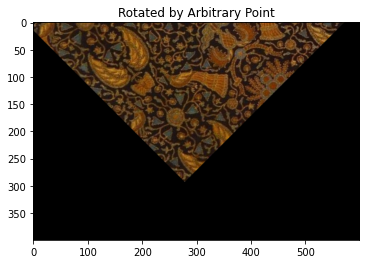

In [89]:
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

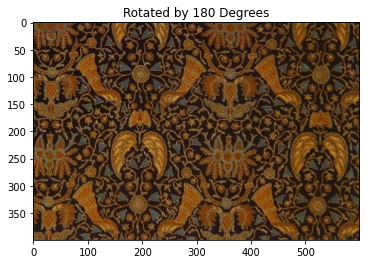

In [90]:
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

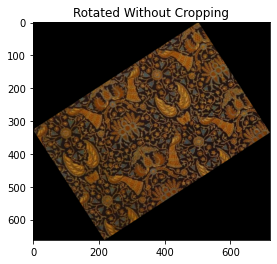

In [91]:
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)


# split merging

In [93]:
args = {
	"image": "1-1.jpg"
}

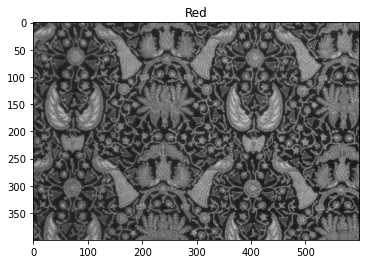

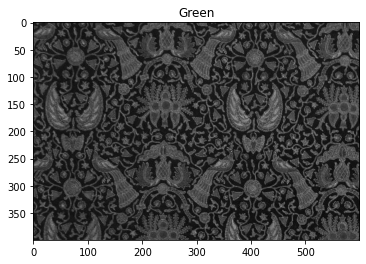

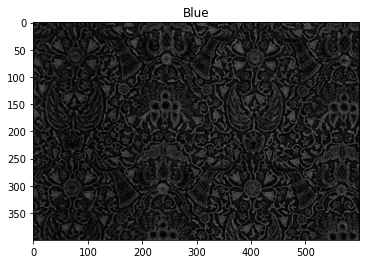

In [94]:
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

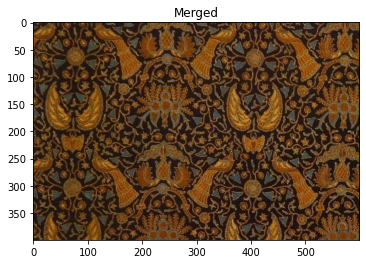

In [95]:

merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

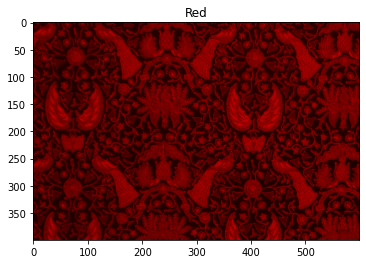

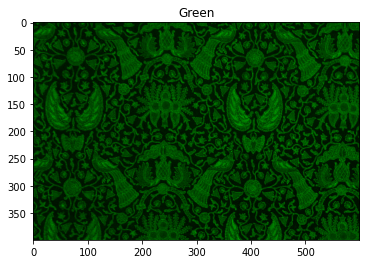

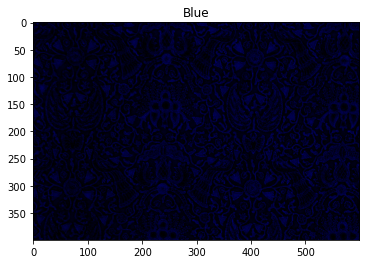

In [96]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

In [97]:
args = {
	"image": "1-1.jpg"
}

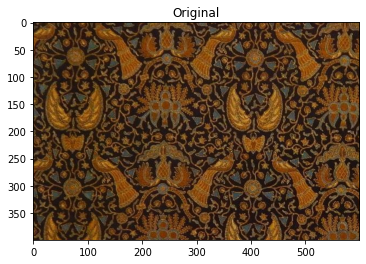

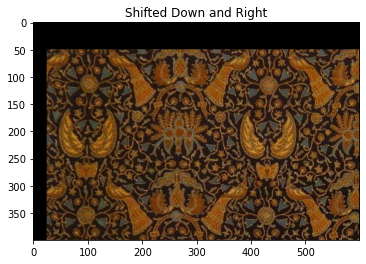

In [98]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

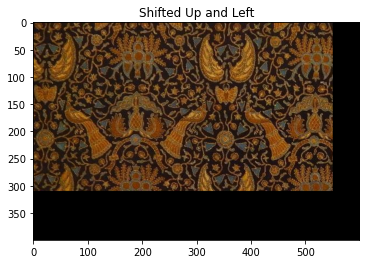

In [99]:
# now, let's shift the image 50 pixels to the left and 90 pixels
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

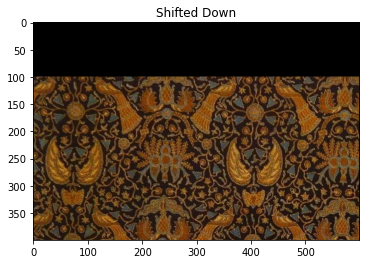

In [100]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(image, 0, 100)
plt_imshow("Shifted Down", shifted)